In [2]:
%matplotlib inline
%load_ext Cython

# A Brief Overview of Python in the Atmospheric Science and Remote Sensing Fields.

Joseph C. Hardin, PNNL



# Overview

This talk will be a "sales pitch" for Python. The goal is to
1. Introduce Python
2. Show why it is a vital tool for atmospheric scientists.
3. Show some cool examples of what it can do. (Some of my examples, a lot of community examples)
4. Place it into the context of the broader community.
5. Give references for further study.


# Takeaways
 * 30 minutes is not enough time to teach Python.
 * But we can introduce it. 
 * This presentation will be very example oriented.
 * with lots of visualizations.
 
 The goal is you leave this presentation
 * with a feel for whether or not Python will benefit you
 * whether it is worth the time or not to learn (it is!).
 * There are a lot of examples online. I've "borrowed" several here from online galleries and blogs.

# This presentation is available online
https://github.com/josephhardinee/YSPD_seminar_PNNL_2016

![Python Graphic](http://imgs.xkcd.com/comics/python.png)

# Python is
* High Level, Interpreted(sometimes compiled), Dynamic(Duck Typing, although optionally static), Object Oriented language(with optional functional attributes) ....(Whew). 
* Often described as executable pseudocode based on the ease with which it is read.


# Why will you use Python though? 
* Python has a truly vast number of 3rd party free(free as in beer and liberties).    
* This makes many tasks **Very** easy. 
* Everyone else is using it. Code can be shared. 
* A great ecosystem surrounding Python

* The answer to "Can Python do that?" is usually yes, with 2 lines of code. 
* Example: 


---- Lifted Parcel Quantities ----
Parcel: MU
Ps  : 881.0hPa
TCs :  20.0C
TDs :  19.7C
-------------
Plcl: 877.5hPa
Tlcl:  19.7C
Plfc: 689.7hPa
P_el: 176.2hPa
CAPE:3523.6J
CIN: -182.1J


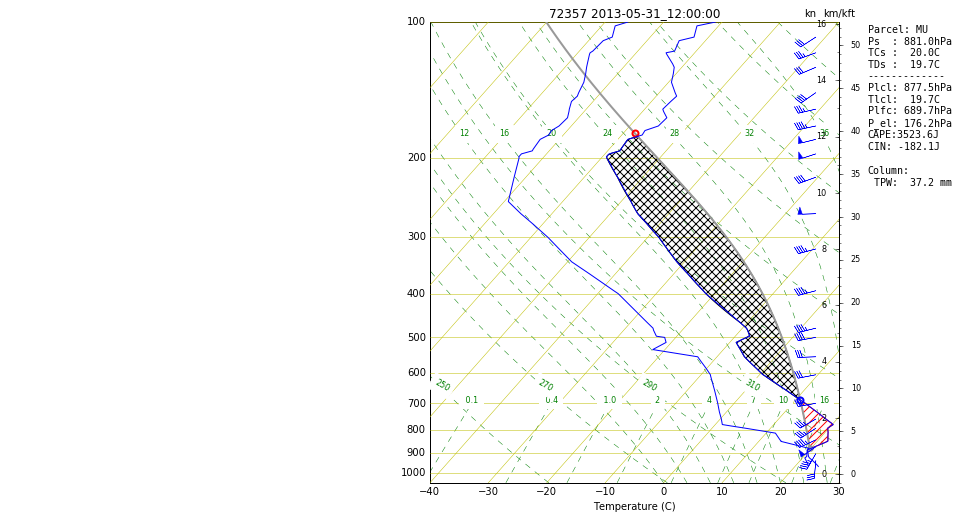

In [3]:
from skewt import SkewT
S=SkewT.Sounding("oun_sounding.txt")
S.plot_skewt(color='b');

# Basic Python Syntax
* Whitespace matters
* Syntax similar to C family of languages(C, Java, matlab).

In [4]:
digits = range(10)
for x in digits:
    print(x)

0
1
2
3
4
5
6
7
8
9


In [5]:
def hello(whom):
    return "Hello %s" % whom

print(hello("world"))


Hello world


* Interpreted
* REPL ( read-eval-print-loop). 

In [7]:
a = 1
b = 2+5
print(a + b)

8


* Dynamic (You can mix some variable types)
* Duck Typing. If it looks like a duck, and quacks like a duck, it's a duck.
* Similar Flow control
* Object oriented.

In [8]:
x = 4
y = 3.3
t = 'Hello YSPD. '

print(x + y)
print(x * t)

7.3
Hello YSPD. Hello YSPD. Hello YSPD. Hello YSPD. 


In [9]:
print(y * t)

TypeError: can't multiply sequence by non-int of type 'float'

# More advanced
* You can learn all about the language semantics yourself.
* Let's cover some more enticing features for your work.

# Cython 

* Extremely readable.
* Can wrap other languages, and has a module to generate compiled code with Cython

In [10]:
%%cython
def intsum(values):
    cdef int value, sum=0
    for value in values:
        sum+= value
    return sum
    

In [11]:
def slowsum(values):
    sum=0
    for value in values:
        sum+= value
    return sum

In [12]:
%timeit slowsum(range(100000))

100 loops, best of 3: 5.15 ms per loop


In [13]:
%timeit intsum(range(100000))

1000 loops, best of 3: 1.17 ms per loop


In [14]:
from math import sin
def f(x):
    return sin(x**2)


def slow_integrate_f(a, b, N):
    
    dx = (b - a)/N
    s = 0
    for i in range(N):
        s += f(a+i*dx)
    return s*dx

In [16]:
%%cython
cdef extern from "math.h":
    double sin(double x)
    
cdef double f(double x):
    return sin(x**2)

cpdef double integrate_f(double a, double b, int N):
    cdef double dx, s
    cdef int i
    
    dx = (b - a)/N
    s = 0
    for i in range(N):
        s += f(a+i*dx)
    return s*dx


In [17]:
%timeit integrate_f(1, 20, 200000)
%timeit slow_integrate_f(1, 20, 200000)

100 loops, best of 3: 2.66 ms per loop
10 loops, best of 3: 59 ms per loop


# Numba

* I focus on speed because that is a common complaint with compiled languages.
* Python has solutions to this as well. Cython above let's you wrap C, and add typing.
* This can add some work, but is worth it. If you're in a hurry...
* Numba on the other hand runs an autojit. No rewriting of code. Let's compare. 

In [18]:
from numba import jit
from numpy import arange

# jit decorator tells Numba to compile this function.
# The argument types will be inferred by Numba when function is called.
@jit
def sum2d(arr):
    M, N = arr.shape
    result = 0.0
    for i in range(M):
        for j in range(N):
            result += arr[i,j]
    return result

def slow_sum2d(arr):
    M, N = arr.shape
    result = 0.0
    for i in range(M):
        for j in range(N):
            result += arr[i,j]
    return result

a = arange(10000).reshape(100,100)
print(sum2d(a))

49995000.0


In [19]:
%timeit slow_sum2d(a)

1000 loops, best of 3: 1.86 ms per loop


In [20]:
%timeit sum2d(a)

100000 loops, best of 3: 19.9 µs per loop


# I'll just leave this here...
* A comparison of LU factorization by IBM.
* Not 100% apples to apples by still impressive:  https://www.ibm.com/developerworks/community/blogs/jfp/entry/A_Comparison_Of_C_Julia_Python_Numba_Cython_Scipy_and_BLAS_on_LU_Factorization?lang=en

![C numba comparison](https://www.ibm.com/developerworks/community/blogs/jfp/resource/BLOGS_UPLOADED_IMAGES/runtimes_103.png)

# Python Ecosystem
The primary strength of Python is the ecosystem that surrounds it. This includes
* Rich Library Support
* More scientific tools than you can shake a stick at. 
* Capable Editors
* Top Notch online communities

I'll cover a few of these here, focusing primarily on the tools and community efforts.

# Distributions

* Python relies heavily on a lare number of packages for scientific use. 
* Companies have released their own python specific managers for these packages (In addition to the actual python package manager). 
* While there are several, just trust me and use Anaconda https://www.continuum.io/downloads
* This includes the amazing conda package manager.
* If not in conda, then use pip (Python package manager).

## Python 2.7 or 3? 
* Use Python 3. 
* Some of us are still stuck on 2.7, but that is changing rapidly. 



# Jupyter and Ipython

## Ipython

* The tool you will use more than anything is IPython. It's another REPL, that can serve as a back end kernel as well.
* Takes regular python interpreter, makes it better (Better errors, command completion, *Magics*)

## Jupyter (IPython Notebook)
* Jupyter, formerly Ipython notebook is a cell based web display for python IDE. It captures code, plots, is executable at the cell level, and serves as a research notebook
* Use this for prototyping and exploring before placing into a script
* This presentation is a Jupyter notebook.


# Spyder and PyCharm

* If you feel more comfortable in Matlab type environment, try spyder. It looks like matlab.
* If you do more large scale development, consider PyCharm.
* For simple everyday use, use the text editor of your choice(I use Vi and emacs).

# NumPy
* Numerics and arrays for Python.
* NumPy will be involved in pretty much everything you do.
* Some of the syntax will be familiar to Matlab users.

In [ ]:
import numpy as np # Bring in the library, give it a shorter name
import matplotlib.pyplot as plt #Ignore this for now.

x = np.arange(0,2*np.pi, 0.01)
y = np.sin(x)
print(x.shape)

plt.plot(x, y)

In [ ]:
x = np.random.randn(10000)
print(x.shape)
x = x.reshape(100,100)
print(x.shape)

y1 = np.sum(x, axis=0)/x.shape[0]
y2 = np.mean(x, axis=0)
print(y1[0],y2[0])



In [ ]:

x = np.array([10,1,4,6,1,27,1,9,1]).reshape(3,3)
X = x.dot(x)

xinv = np.linalg.inv(x)


print(X)
print(X.dot(xinv))
print(x)

# Scipy
* Umbrella library for a large number of tools of scientific use.
* This includes, stats, optimization, etc.
* Also includes scikit's, which are like matlab toolboxes. http://scikits.appspot.com/scikits

*Scikit-learn example: plot_digits

# Matplotlib
* Primary Plotting library for Python
* Started off replicating matlab functionality.
* Now it's a fair bit better IMO. 
* Huge amount of functionality.

Example:
scatter3d_demo.py

Example: inset_locator_demo2.py

In [ ]:
y = np.random.randn(100000)
x = np.random.randn(100000)

plt.hist2d(x,y, cmap='jet', bins=100);
plt.xlabel('X axis')
plt.ylabel('$\sum_x^y{x^2 - y^2}$')
plt.title('A test image')
plt.colorbar()

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

x = np.arange(0,100)
y = np.exp(x)

plt.plot(x, y) # Let's try this interactively

# Pandas and Seaborn
Pandas is Python's answer to the R programming language. It is a statistics library for data processing based around the concept of Time Series, and Data Frames


In [ ]:
import pandas as pd
bikes = pd.read_csv('data/bikes.csv', 
                    sep=';', encoding='latin1', 
                    parse_dates=['Date'], dayfirst=True, 
                    index_col='Date')
# Add the weekday column
berri_bikes = bikes[['Berri 1']]
berri_bikes['weekday'] = berri_bikes.index.weekday

# Add up the number of cyclists by weekday, and plot!
weekday_counts = berri_bikes.groupby('weekday').aggregate(sum)
weekday_counts.index = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
weekday_counts.plot(kind='bar')



In [ ]:
# %load examples/seaborn_example.py
import seaborn as sns
import matplotlib.pyplot as plt
# sns.set(style="whitegrid")

# Load the example dataset of brain network correlations
df = sns.load_dataset("brain_networks", header=[0, 1, 2], index_col=0)

# Pull out a specific subset of networks
used_networks = [1, 3, 4, 5, 6, 7, 8, 11, 12, 13, 16, 17]
used_columns = (df.columns.get_level_values("network")
                                  .astype(int)
                                                            .isin(used_networks))
df = df.loc[:, used_columns]

# Compute the correlation matrix and average over networks
corr_df = df.corr().groupby(level="network").mean()
corr_df.index = corr_df.index.astype(int)
corr_df = corr_df.sort_index().T

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 6))

# Draw a violinplot with a narrower bandwidth than the default
sns.violinplot(data=corr_df, palette="Set3", bw=.2, cut=1, linewidth=1)

# Finalize the figure
ax.set(ylim=(-.7, 1.05))
sns.despine(left=True, bottom=True)
plt.savefig('img/seaborn_example.png')


# A little easier to see
![seaborn example](img/seaborn_example.png)

# Basemap, cartopy, etc
* Basemap is a matplotlib extension that adds map plotting support.
* Examples at: http://matplotlib.org/basemap/users/examples.html
* Cartopy is a similar library with fancier features. 
* http://scitools.org.uk/cartopy/docs/latest/gallery.html

![Basemap example](http://matplotlib.org/basemap/_images/plotsst.png)

# More specific Libraries for what I do that I contribute to or run. 
Just to put these out there for those that work within my sphere of influence(Radar, DSDs, etc).

1. Py-ART. Python ARM Radar Toolbox. Good for reading in radar data. Also has some basic manipulation support(gridding, etc).
2. PyDisdrometer. Python library for processing disdrometer, particle probe, and DSD data.
3. PyTMatrix. TMatrix scattering library. 
4. ARTView. Radar Data Viewer. 

# Scipy(The conference), PyData, Women who code. 
* Moving on from libraries there are a few "community" aspects of note.
* SciPy hosts a yearly conference in Austin, Tx which is amazing.
* FYI, SciPy is the library, the organization, and the conference name. A bit confusing.
* PyData is a similar conference series based around machine learning/data science.
* Finally Women Who Code (It's about what it sounds like), is doing some pretty interesting outreach. 

# PyAOS
* There is a community just for Python in the atmospheric sciences.
* http://pyaos.johnny-lin.com/
* The webpage is decent, the mailinglist is a great place to get questions answered. 


# pep8
* Before you run out and fill the world up with wonderful code, a word of caution.
* PEPs are python enhancement proposals. They are essentially sets of guidelines for the language and modifications to it.
* You should read pep8 as you'll hear it referred to often. It lays out a set of style guidelines that makes code look much better. 
* There are tools to automatically enforce this. 
* https://www.python.org/dev/peps/pep-0008/ 

# Examples

# Example 1: Density Plots (And a big pet peeve)
* In most cases scatter plots are the incorrect choice of plot. They can be misleading. Very misleading. 
* When a large number of points, use density plots. 
* Should you be presenting a linear number of points, of logarithmic density? 
* Let's do this in python very easily. 

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
x1 = np.random.randn(10000); y1 = np.random.randn(10000)
x2 = np.random.randn(10000)/2.0; y2 = -1*x2
x = np.hstack((x2, x1)); y = np.hstack((y2,y1))
plt.figure(figsize=(6,6)); plt.subplot(3,1,1); plt.scatter(x, y);
plt.subplot(3,1,2); plt.hist2d(x,y, bins=100);plt.colorbar(); plt.subplot(3,1,3)
plt.hist2d(x,y,bins=100, norm=LogNorm()); plt.colorbar()

# Example 2: Radar Data
Let's read in a data from the NPOL radar, and plot a few fields. 


In [ ]:
import pyart
radar = pyart.io.read('data/mc3e_npol_20110427_115557.uf')
display = pyart.graph.RadarDisplay(radar)
display.plot('reflectivity', vmin=0, vmax=45)
plt.xlim(0,100)
plt.ylim(0,10)

# Example 3: Basemap
This example from the basemap gallery shows plotting contours on a projected map.

* examples/contour1.py

# Example 4: Bokeh
Bokeh is a plotting library that utilizes the browser. This makes it perfect for sharing results with a wider audience. 

* Bokeh Example

# Example 5: Warno
Closer to home, WARNO is a monitoring and analytics application developed by the radar team to monitor 33 radars around the world. 

https://dellingr.pnl.gov:8443

# Example 6: IPCluster and IPyParallel
* IPython parallel supports HPC type applications(Running on a cluster).

In [ ]:
from ipyparallel import Client

def square(x):
    return x**2

c = Client(profile='local')
print(c.ids)
%px print('Hello World')

x = np.arange(0,10)
v = c[:]
v.map_sync(square, x)

# Example 7: Mayavi
* Canyon
* Julia
* Lorenz

# Example 8: SkewT

* The PySkewT Package shown earlier provides the ability to plot skewT Diagrams.
* This seems to be a commonly requested thing.

* SkewT Example

from skewt import SkewT
S=SkewT.Sounding("oun_sounding.txt")
S.plot_skewt(color='b');

# Further Resources

# Books

1. Effective Computation in the Physical Sciences
2. Python for Data Processing
3. Python 3



# Websites
1. PyAOS
2. StackOverflow
3. Continuum Analytics
4. Enthought.
5. Code like a Pythonista(Common Python Idioms): http://python.net/~goodger/projects/pycon/2007/idiomatic/handout.html

# CoWorkers
A lot of people around PNNL use Python.
1. From the radar group there is Alyssa Matthews, Eddie Schumann, and myself.
2. Susannah Burrows, Phil Rausch
3. Others I'm sure



    Debugging is twice as hard as writing the code in the first place. Therefore, if you write the code as cleverly as possible, you are, by definition, not smart enough to debug it.

    —Brian W. Kernighan, co-author of The C Programming Language and the "K" in "AWK"
